## Project: 🌿 Plant Disease Prediction & Get Cure App



---



In [1]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

# for accuracy and loss graph
import matplotlib.pyplot as plt

In [2]:
keras.__version__

'2.9.0'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




---



In [4]:
#Banana data set
train_data_path_B = "/content/drive/My Drive/Plant_Leaf_Data/Banana/Train"
validation_data_path_B = "/content/drive/My Drive/Plant_Leaf_Data/Banana/Test"



---



In [5]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [6]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.01,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [7]:
# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data_B = training_datagen.flow_from_directory(train_data_path_B, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 856 images belonging to 4 classes.




---



In [8]:
training_data_B.class_indices

{'cordana': 0, 'healthy': 1, 'pestalotiopsis': 2, 'sigatoka': 3}



---



In [9]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data_B = valid_datagen.flow_from_directory(validation_data_path_B,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 80 images belonging to 4 classes.


/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 99 bytes but only got 74. Skipping tag 45059
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/JpegImagePlugin.py:792: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


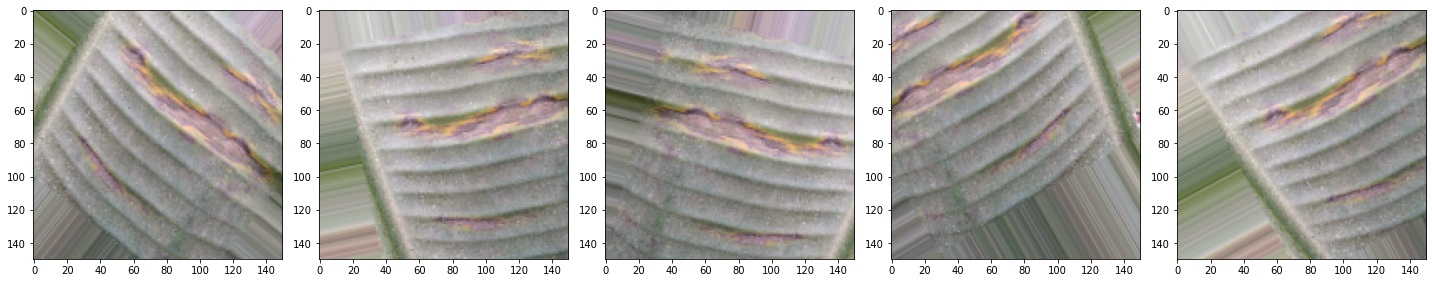

In [11]:
# showing augmented images
images_B = [training_data_B[0][0][0] for i in range(5)]
plotImages(images_B)



---



In [12]:
# save best model using vall accuracy
model2_path = '/content/drive/My Drive/Plant_Leaf_Data/Cotton/Actual_Banana.h5'
checkpoint = ModelCheckpoint(model2_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]



---



In [13]:
#Building cnn model for Cotton
cnn_model2 = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])


# compile cnn model
cnn_model2.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [14]:
cnn_model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0



---





---



In [ ]:
# train cnn model2
history2 = cnn_model2.fit(training_data_B, 
                          epochs=100, 
                          verbose=1, 
                          validation_data= valid_data_B,
                          callbacks=callbacks_list) # time start 7.40

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 99 bytes but only got 74. Skipping tag 45059
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/JpegImagePlugin.py:792: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


Epoch 1/100
27/27 [==============================] - ETA: 0s - loss: 1.0910 - accuracy: 0.5140 
Epoch 1: val_accuracy improved from -inf to 0.55000, saving model to /content/drive/My Drive/Plant_Leaf_Data/Cotton/Actual_Banana.h5
27/27 [==============================] - 483s 18s/step - loss: 1.0910 - accuracy: 0.5140 - val_loss: 1.1478 - val_accuracy: 0.5500
Epoch 2/100
27/27 [==============================] - ETA: 0s - loss: 0.9423 - accuracy: 0.6063
Epoch 2: val_accuracy did not improve from 0.55000
27/27 [==============================] - 240s 9s/step - loss: 0.9423 - accuracy: 0.6063 - val_loss: 1.1424 - val_accuracy: 0.5125
Epoch 3/100
27/27 [==============================] - ETA: 0s - loss: 0.8928 - accuracy: 0.6273
Epoch 3: val_accuracy did not improve from 0.55000
27/27 [==============================] - 243s 9s/step - loss: 0.8928 - accuracy: 0.6273 - val_loss: 1.0668 - val_accuracy: 0.5375
Epoch 4/100
27/27 [==============================] - ETA: 0s - loss: 0.8862 - accuracy: 

In [ ]:

model_path4 = '/content/drive/My Drive/Plant_Leaf_Data/Banana/Banana_cnn.h5'
cnn_model2.save(model_path4)

In [1]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: ignored